In [239]:
# Homework 2 BI-OBJECTIVE PERIODIC REVIEW

from docplex.mp.model import Model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import math
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

![Screenshot 2023-12-04 alle 23.41.11.png](<attachment:Screenshot 2023-12-04 alle 23.41.11.png>)
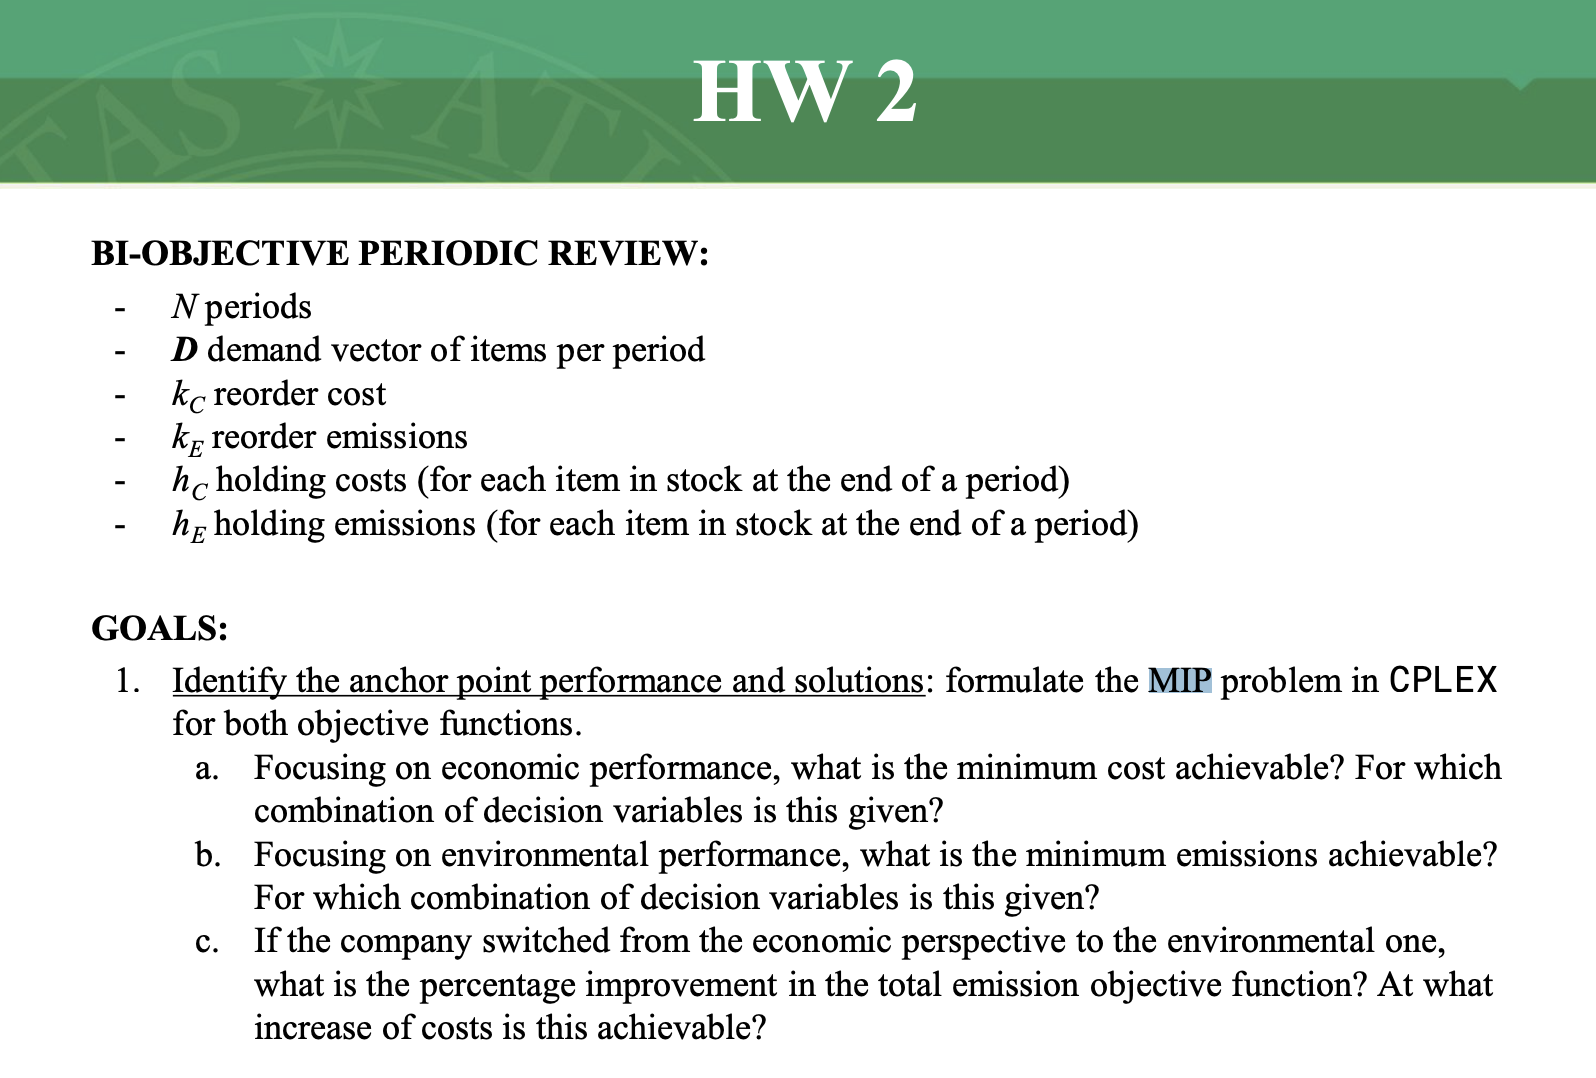

![Screenshot 2023-12-04 alle 23.41.55.png](<attachment:Screenshot 2023-12-04 alle 23.41.55.png>)
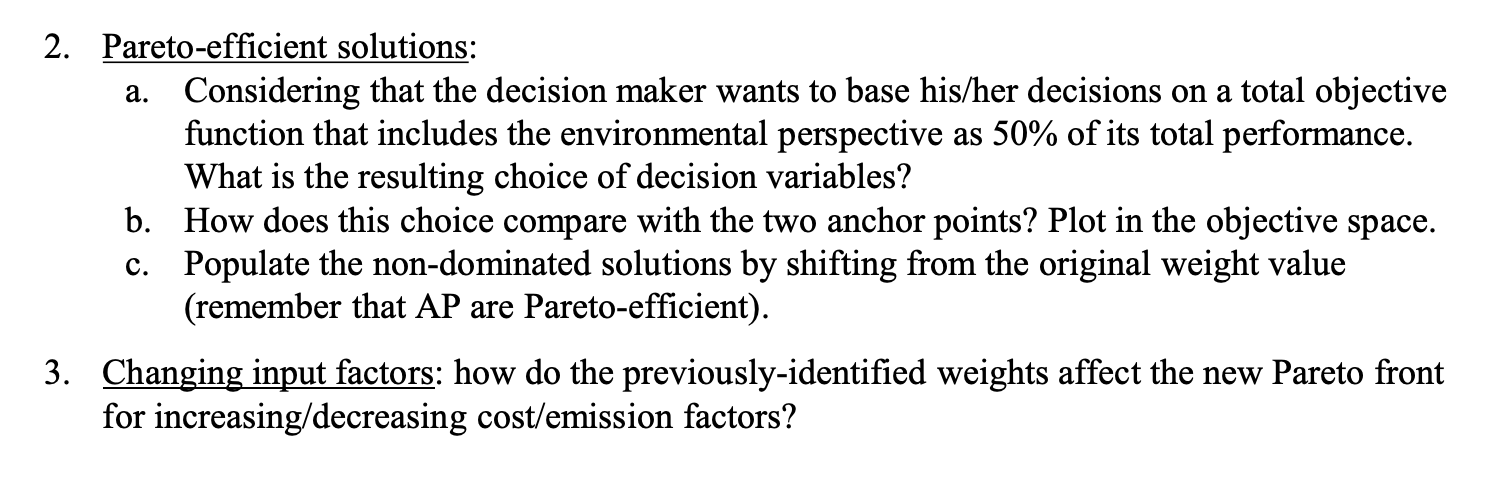

GOAL 1: Identify the anchor point performance and solutions

In [240]:
# Optimization model
mdl = Model(name='peroidic_review')

In [241]:
# Parameters

D = [12, 4, 1, 5, 9, 2, 1, 15, 51, 2, 13, 9, 11] # Demand in every period
N = len(D)  # Numeber of period
kc = 200    # Reorder cost
hc = 1  # Holding cost
ke = 100    # Reorder emission
he = 6  # Holding emission




In [242]:
# Decision variable

y = mdl.binary_var_list(N, name='y')   # List for index variable (Matrix for 2 indeces)
x = mdl.integer_var_list(N,name='x')

In [243]:
# Objective function (Economic evaluation)
mdl.minimize(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N))
              + mdl.sum(kc*y[t] for t in range(N)))


In [244]:
# Constraints (Economic evaluation)

for t in range(N):
    mdl.add_constraint(mdl.sum(x[j]-D[j] for j in range(t+1)) >= 0)

for t in range(N):
    M = 10000
    mdl.add_constraint(x[t]<=M*y[t])

for t in range(N):
    mdl.add_constraint(x[t]>=0)

In [245]:
# Solution (Economic evaluation)
print(mdl.export_to_string())
value = sol = mdl.solve()
sol.display()

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: peroidic_review

Minimize
 obj: 200 y_0 + 200 y_1 + 200 y_2 + 200 y_3 + 200 y_4 + 200 y_5 + 200 y_6
      + 200 y_7 + 200 y_8 + 200 y_9 + 200 y_10 + 200 y_11 + 200 y_12 + 13 x_0
      + 12 x_1 + 11 x_2 + 10 x_3 + 9 x_4 + 8 x_5 + 7 x_6 + 6 x_7 + 5 x_8 + 4 x_9
      + 3 x_10 + 2 x_11 + x_12 -790
Subject To
 c1: x_0 >= 12
 c2: x_0 + x_1 >= 16
 c3: x_0 + x_1 + x_2 >= 17
 c4: x_0 + x_1 + x_2 + x_3 >= 22
 c5: x_0 + x_1 + x_2 + x_3 + x_4 >= 31
 c6: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 >= 33
 c7: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 >= 34
 c8: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 >= 49
 c9: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 >= 100
 c10: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 >= 102
 c11: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 >= 115
 c12: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11
       >= 124
 c13: x_0 + x_1 + x_2 

In [246]:
# ECONOMIC EVALUATION

Tc1 = sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))
          )+sum(kc * sol.get_value(y[t]) for t in range(N))

Te1 = sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))
          )+sum(ke * sol.get_value(y[t]) for t in range(N))

COST_econ=[Tc1,Te1]

print(COST_econ)

[658.0, 1748.0]


In [247]:
# Objective function (Emission evaluation)
mdl.minimize(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N))
              + mdl.sum(ke*y[t] for t in range(N)))

In [248]:
# Constraints (Emission evaluation)

for t in range(N):
    mdl.add_constraint(mdl.sum(x[j]-D[j] for j in range(t+1)) >= 0)

for t in range(N):
    mdl.add_constraint(x[t]<=M*y[t])

for t in range(N):
    mdl.add_constraint(x[t]>=0)

In [249]:
# Solution (Emission evaluation)
print(mdl.export_to_string())
sol = mdl.solve()
sol.display()

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: peroidic_review

Minimize
 obj: 100 y_0 + 100 y_1 + 100 y_2 + 100 y_3 + 100 y_4 + 100 y_5 + 100 y_6
      + 100 y_7 + 100 y_8 + 100 y_9 + 100 y_10 + 100 y_11 + 100 y_12 + 78 x_0
      + 72 x_1 + 66 x_2 + 60 x_3 + 54 x_4 + 48 x_5 + 42 x_6 + 36 x_7 + 30 x_8
      + 24 x_9 + 18 x_10 + 12 x_11 + 6 x_12 -4740
Subject To
 c1: x_0 >= 12
 c2: x_0 + x_1 >= 16
 c3: x_0 + x_1 + x_2 >= 17
 c4: x_0 + x_1 + x_2 + x_3 >= 22
 c5: x_0 + x_1 + x_2 + x_3 + x_4 >= 31
 c6: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 >= 33
 c7: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 >= 34
 c8: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 >= 49
 c9: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 >= 100
 c10: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 >= 102
 c11: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 >= 115
 c12: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11
       >= 124
 c13: x_0 +

In [250]:
# ENVIROMENTAL EVALUATION

Tc2 = sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))
          ) + sum(kc * sol.get_value(y[t]) for t in range(N))

Te2 = sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))
          ) + sum(ke * sol.get_value(y[t]) for t in range(N))

COST_emission = [Tc2,Te2]

print(COST_emission)

[1233.0, 798.0]


In [251]:
ImprovECONOMIC = ((COST_emission[0]-COST_econ[0])/(COST_econ[0]))*100

ImprovEINV = ((COST_econ[1]-COST_emission[1])/(COST_econ[1]))*100

print('The costs have increased by :',ImprovECONOMIC,'% and the emission are reduced by',ImprovEINV,'%')

The costs have increased by : 87.38601823708207 % and the emission are reduced by 54.347826086956516 %


GOAL 2: Parte efficient solution

In [252]:
# CONSTRAINTS

for t in range(N):
    mdl.add_constraint(mdl.sum(x[j]-D[j] for j in range(t+1)) >= 0)

for t in range(N):
    mdl.add_constraint(x[t]<=M*y[t])

for t in range(N):
    mdl.add_constraint(x[t]>=0)


In [253]:
# OBJECTIVE FUNCTION

mdl.minimize(0.5*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
             (0.5*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))

In [254]:
# Solution (Economic evaluation)
print(mdl.export_to_string())
sol = mdl.solve()
sol.display()

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: peroidic_review

Minimize
 obj: 150 y_0 + 150 y_1 + 150 y_2 + 150 y_3 + 150 y_4 + 150 y_5 + 150 y_6
      + 150 y_7 + 150 y_8 + 150 y_9 + 150 y_10 + 150 y_11 + 150 y_12
      + 45.500000000000 x_0 + 42 x_1 + 38.500000000000 x_2 + 35 x_3
      + 31.500000000000 x_4 + 28 x_5 + 24.500000000000 x_6 + 21 x_7
      + 17.500000000000 x_8 + 14 x_9 + 10.500000000000 x_10 + 7 x_11
      + 3.500000000000 x_12 -2765
Subject To
 c1: x_0 >= 12
 c2: x_0 + x_1 >= 16
 c3: x_0 + x_1 + x_2 >= 17
 c4: x_0 + x_1 + x_2 + x_3 >= 22
 c5: x_0 + x_1 + x_2 + x_3 + x_4 >= 31
 c6: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 >= 33
 c7: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 >= 34
 c8: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 >= 49
 c9: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 >= 100
 c10: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 >= 102
 c11: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 >= 115
 

In [255]:
Tc3 = sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))
          ) + sum(kc * sol.get_value(y[t]) for t in range(N))

Te3 = sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))
          ) + sum(ke * sol.get_value(y[t]) for t in range(N))

COST_half = [Tc3,Te3]

print(COST_half)

[1055.0, 830.0]


C:\Users\jacop\AppData\Local\Temp\ipykernel_10272\1639171783.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_green = get_cmap('Greens')
C:\Users\jacop\AppData\Local\Temp\ipykernel_10272\1639171783.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_red = get_cmap('Reds')
C:\Users\jacop\AppData\Local\Temp\ipykernel_10272\1639171783.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_blue = get_cmap('Blues')


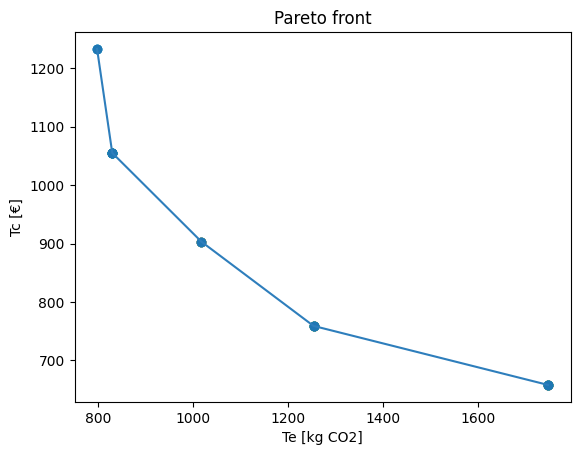

In [256]:
TEN = []
TCO = []
cmap_green = get_cmap('Greens')
cmap_red = get_cmap('Reds')
cmap_blue = get_cmap('Blues')


for percentage in range(11):
    
    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TCO.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TEN.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TEN,TCO)

    
plt.plot([point[0] for point in TEN], [point[0] for point in TCO], linestyle='-', color=cmap_blue(0.7))


plt.xlabel('Te [kg CO2]')
plt.ylabel('Tc [€]')
plt.title('Pareto front')
plt.show()



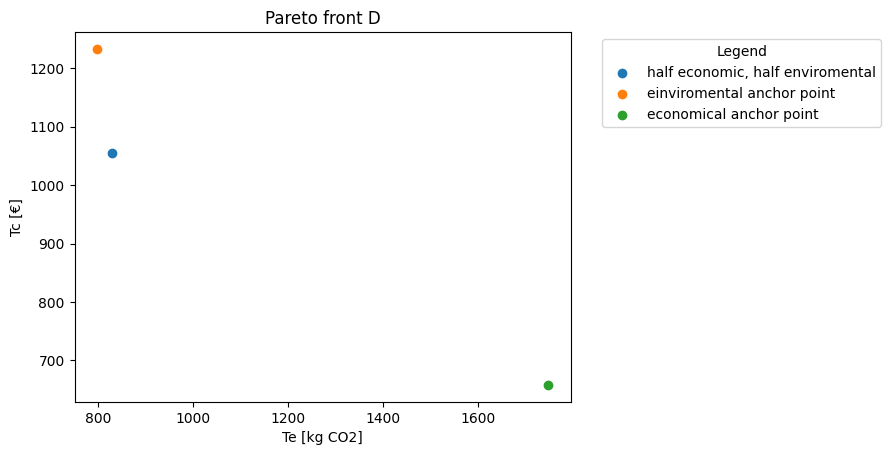

In [257]:

# PLOT THE THREE MAIN POINT

plt.scatter(COST_half[1],COST_half[0],label=f'half economic, half enviromental')
plt.scatter(COST_emission[1],COST_emission[0],label=f'einviromental anchor point')
plt.scatter(COST_econ[1],COST_econ[0],label=f'economical anchor point')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Te [kg CO2]')
plt.ylabel('Tc [€]')
plt.title('Pareto front D')
plt.show()


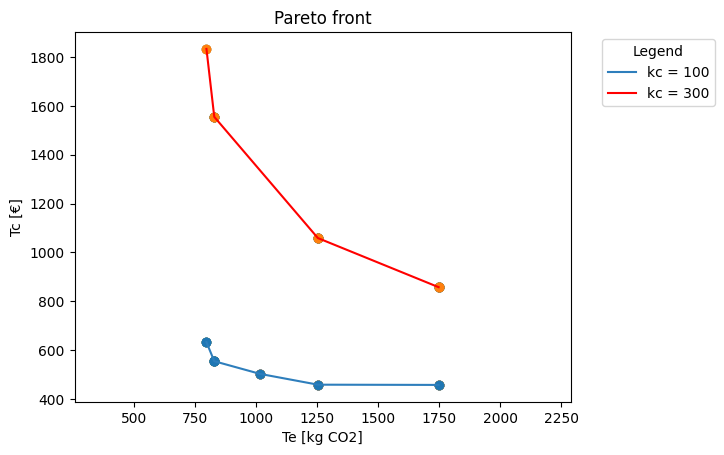

In [258]:
# #CHANGING kc

TE = []
TC = []
TE2 = []
TC2 = []
kc = 100
kc1 = 300
hc = 1  # Holding cost
ke = 100    # Reorder emission
he = 6  # Holding emission

for percentage in range(11):
    
    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                  (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TC.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TE.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TE,TC)

    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc1*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TC2.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc1 * sol.get_value(y[t]) for t in range(N))])

    TE2.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TE2,TC2)

    

plt.plot([point[0] for point in TE], [point[0] for point in TC], linestyle='-', color=cmap_blue(0.7) , label='kc = 100')
plt.plot([point[0] for point in TE2], [point[0] for point in TC2], linestyle='-', color='red', label='kc = 300')

plt.axis('equal')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Te [kg CO2]')
plt.ylabel('Tc [€]')
plt.title('Pareto front')
plt.show()

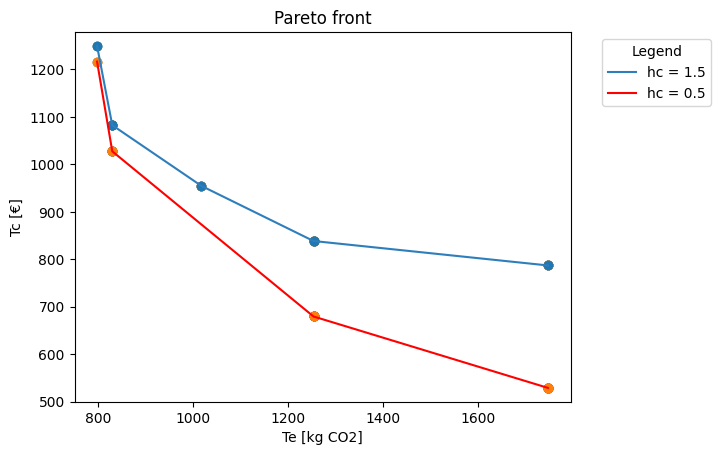

In [259]:
# #CHANGING hc

TEH = []
TCH = []
TE2H = []
TC2H = []
hc = 1.5
hc1 = 0.5
kc = 200    # Reorder cost
ke = 100    # Reorder emission
he = 6  # Holding emission

for percentage in range(11):
    
    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TCH.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TEH.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TEH,TCH)

    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc1*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TC2H.append([sum((hc1 * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TE2H.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TE2H,TC2H)

    

plt.plot([point[0] for point in TEH], [point[0] for point in TCH], linestyle='-', color=cmap_blue(0.7) , label='hc = 1.5')
plt.plot([point[0] for point in TE2H], [point[0] for point in TC2H], linestyle='-', color='red', label='hc = 0.5')

plt.axis('equal')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Te [kg CO2]')
plt.ylabel('Tc [€]')
plt.title('Pareto front')
plt.show()

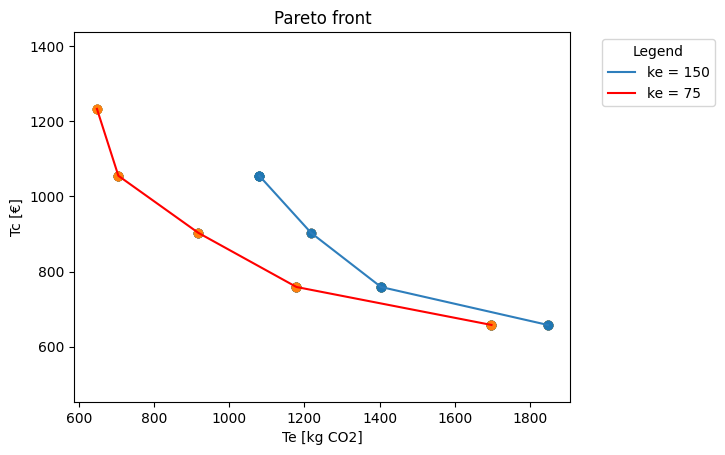

In [260]:
# #CHANGING Ke

TEK = []
TCK = []
TE2K = []
TC2K = []
ke = 150
ke1 = 75
kc = 200    # Reorder cost
hc = 1  # Holding cost
he = 6  # Holding emission

for percentage in range(11):
    
    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TCK.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TEK.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TEK,TCK)

    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke1*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TC2K.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TE2K.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke1 * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TE2K,TC2K)

    

plt.plot([point[0] for point in TEK], [point[0] for point in TCK], linestyle='-', color=cmap_blue(0.7) , label='ke = 150')
plt.plot([point[0] for point in TE2K], [point[0] for point in TC2K], linestyle='-', color='red', label='ke = 75')

plt.axis('equal')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Te [kg CO2]')
plt.ylabel('Tc [€]')
plt.title('Pareto front')
plt.show()

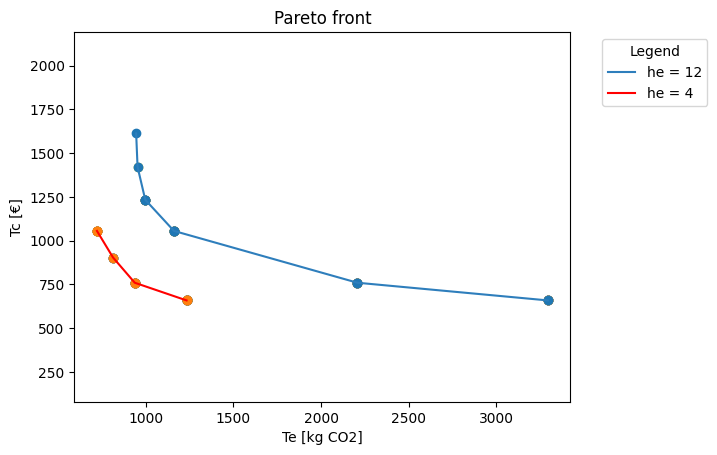

In [261]:
# CHANGING INPUT FACTORS he 

he = 4    # Reorder emission
he1 = 12
kc = 200    # Reorder cost
hc = 1  # Holding cost
ke = 100    # Reorder emission


TEHE = []
TCHE = []
TE1HE = []
TC1HE = []
for percentage in range(11):
    
    mdl.minimize((percentage/10)*(mdl.sum(he1*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TCHE.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TEHE.append([sum((he1 * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TEHE,TCHE)

    mdl.minimize((percentage/10)*(mdl.sum(he*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(ke*y[t] for t in range(N)))+
                 (round(1-(percentage/10),2)*(mdl.sum(hc*mdl.sum(x[j]-D[j] for j in range(G+1))for G in range(N)) + mdl.sum(kc*y[t] for t in range(N)))))
    
    sol = mdl.solve()
    
    TC1HE.append([sum((hc * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(kc * sol.get_value(y[t]) for t in range(N))])

    TE1HE.append([sum((he * sum(sol.get_value(x[j]) - D[j] for j in range(G + 1)) for G in range(N))) + sum(ke * sol.get_value(y[t]) for t in range(N))])
    
    plt.scatter(TE1HE,TC1HE)

    
    

# Connect points with lines
plt.plot([point[0] for point in TEHE], [point[0] for point in TCHE], linestyle='-',  color=cmap_blue(0.7), label='he = 12')
plt.plot([point[0] for point in TE1HE], [point[0] for point in TC1HE], linestyle='-', color='red', label='he = 4')

plt.axis('equal')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Te [kg CO2]')
plt.ylabel('Tc [€]')
plt.title('Pareto front')
plt.show()
